## This notebook intersects the predicted segments with ground truth : roads as line features

## in addition, plotting and calculating statistics from the results

## Saving the final results

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
import glob

In [55]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
predicted_segments = [pred for pred in glob.glob(os.path.join(r".\results","predicted*.shp"))]
line_roads = [line for line in glob.glob(os.path.join(r".\vector","st*.shp"))]



In [12]:
areas = ["area_1","area_2","area_3"]

In [18]:
for area in areas:
    
    segment = [s for s in predicted_segments if area in s ][0]
    road = [r for r in line_roads if area in r][0]

    # Intersection and FINAL RESULT IN SHAPEFILE FORMAT
    intersection_segment_road = gpd.sjoin(gpd.read_file(segment), gpd.read_file(road), op='intersects').to_file(r".\results\roads_polygons_"+area+".shp", driver = "ESRI Shapefile")
    
    print("....")
    
    

....
....
....


## Pie charts

In [38]:
main_results = [result for result in glob.glob(r".\results\roads_polygons*.shp")]
print(main_results[0].split(".")[1][-6:])

area_1


1
12    495
10    357
9     179
8     166
Name: Liik, dtype: int64
12    397
10    175
9      49
8      26
Name: Liik, dtype: int64


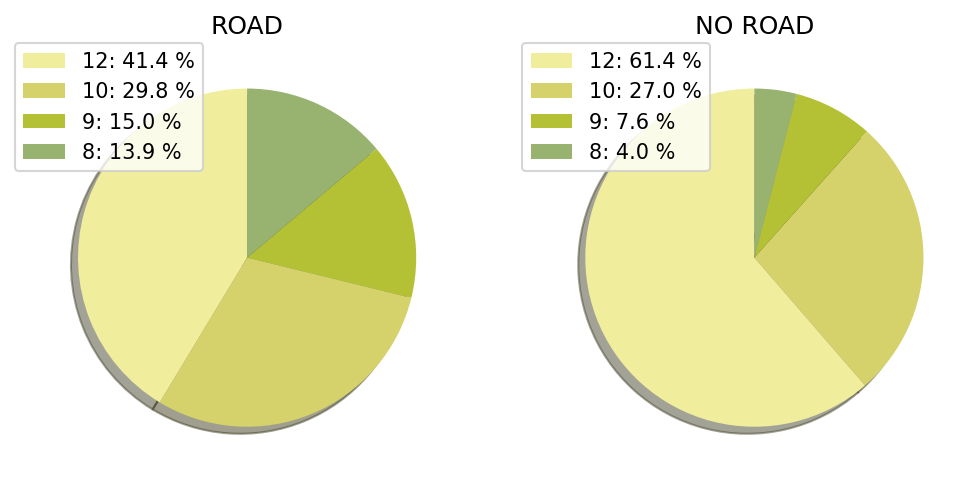

2
10    477
12    135
9      31
Name: Liik, dtype: int64
10    625
12    214
9      22
8      15
Name: Liik, dtype: int64


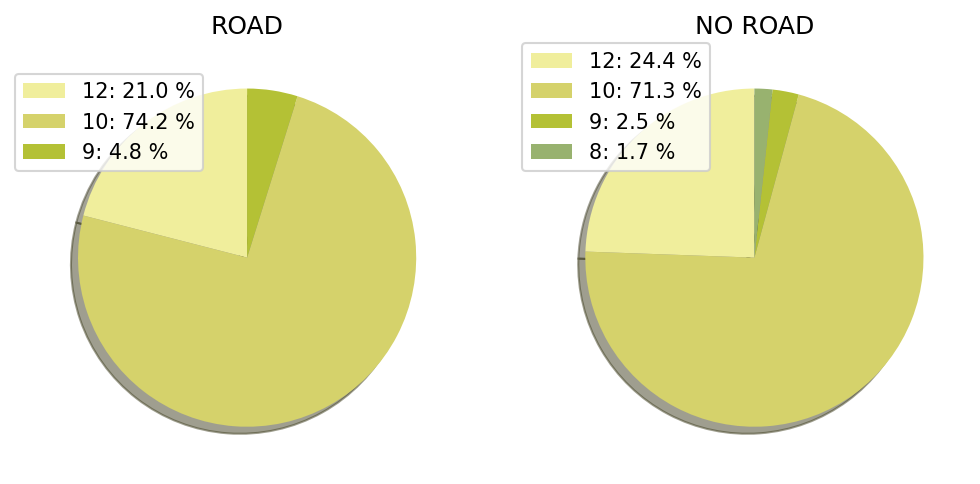

3
12    451
9     179
8      54
2      41
7      20
10      6
Name: Liik, dtype: int64
12    181
10     17
9       9
2       1
Name: Liik, dtype: int64


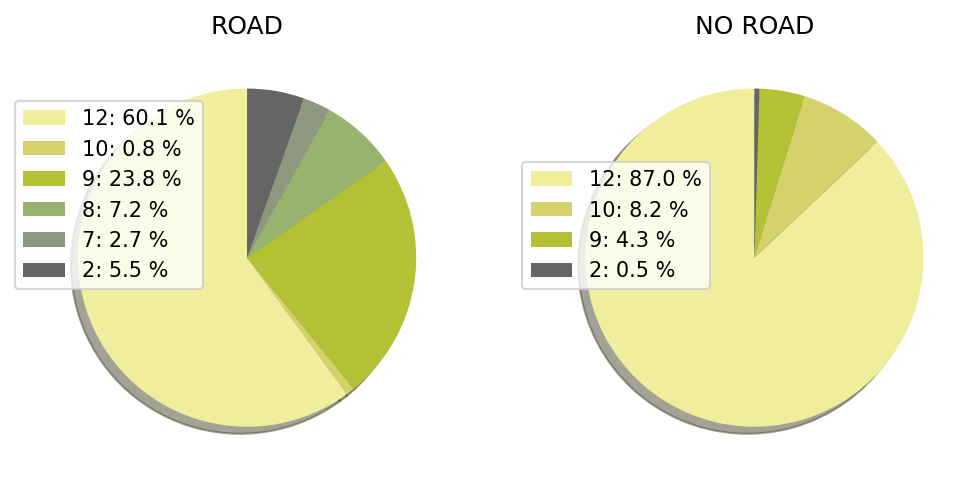

In [39]:
dict_colors = {'12': '#F0EE9C',
              '10': '#D5D26B',
              '9':'#B4C135',
              '8':'#98B26F',
              '7':'#8E987F',
              '6':'#8E987F',
              '5':'#8E987F',
              '4':'#8E987F',
              '3':'#8E987F',
              '2':'#656663',
              '1':'#656663'}


for i in main_results:
    print(i.split("_")[-1].split(".")[0])
   
    gdf = gpd.read_file(i)

    
    gdf_road = gdf.loc[gdf.cat_p  == 1]
    gdf_Nroad = gdf.loc[gdf.cat_p  == 0]
    
     # the same figure for both subplots
    fig = plt.figure(figsize=(8,8),dpi=150)
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    unq_list_R =  gdf_road['Liik'].sort_values(ascending=False).astype(str).unique()
    unq_list_NR = gdf_Nroad['Liik'].sort_values(ascending=False).astype(str).unique()
    
    ax1.pie(gdf_road.Liik.value_counts().sort_index(ascending=False), colors = [dict_colors[key] for key in unq_list_R],
            shadow=True, startangle=90 )

    ax2.pie(gdf_Nroad.Liik.value_counts().sort_index(ascending=False),colors =[dict_colors[key] for key in unq_list_NR],
            shadow=True, startangle=90)
    
    print(gdf_road.Liik.value_counts())
    print(gdf_Nroad.Liik.value_counts())
    
    ax1.set_title('ROAD')
    ax2.set_title('NO ROAD')
    
    percentR = gdf_road.Liik.value_counts().sort_index(ascending=False).to_numpy() * 100 / gdf_road.Liik.value_counts().sort_index(ascending=False).to_numpy().sum()
    percentsNR = gdf_Nroad.Liik.value_counts().sort_index(ascending=False).to_numpy() * 100 / gdf_Nroad.Liik.value_counts().sort_index(ascending=False).to_numpy().sum()
    
          
    if len(gdf_road.Liik.unique()) > 4 :
        anch = (0.42,0.4)
    else:
        anch = (0.42,0.68)
    
    ax1.legend( bbox_to_anchor= anch, loc='lower right',
            labels=['%s: %1.1f %%' % (l, s) for l, s in zip(gdf_road.Liik.value_counts().sort_index(ascending=False).index,
                                                            percentR)]
              )
    
    ax2.legend( bbox_to_anchor= anch, loc='lower right',
            labels=['%s: %1.1f %%' % (l, s) for l, s in zip(gdf_Nroad.Liik.value_counts().sort_index(ascending=False).index,
                                                            percentsNR)]
    
    
    )
    
    plt.savefig(os.path.join(r".\results","pieChart_"+i.split(".")[1][-6:]+".png"), dpi = 200)
    plt.show()

## plotting the segmentations and calculate statistics

manually

In [66]:
area_1_segmn_binary = r".\results\predicted_segments_area_1_binary_updt.shp"
area_1_segmn_binary = gpd.read_file(area_1_segmn_binary)
#area2
area_2_segmn_binary= r".\results\predicted_segments_area_2_binary_updt.shp"
area_2_segmn_binary = gpd.read_file(area_2_segmn_binary)
#area3
area_3_segmn_binary = r".\results\predicted_segments_area_3_binary_updt.shp"
area_3_segmn_binary = gpd.read_file(area_3_segmn_binary)

In [67]:
intersection_area1 = r".\results\roads_polygons_area_1.shp"
intersection_area1 = gpd.read_file(intersection_area1)

intersection_area2 = r".\results\roads_polygons_area_2.shp"
intersection_area2 = gpd.read_file(intersection_area2)

intersection_area3 = r".\results\roads_polygons_area_3.shp"
intersection_area3 = gpd.read_file(intersection_area3)

In [68]:
print("area 1")
print(intersect_area1["cat_p"].value_counts())
print("area 2")
print(intersect_area2["cat_p"].value_counts())
print("area 3")
print(intersect_area3["cat_p"].value_counts())

area1_road_perc = 1257 * 100/len(intersection_area1)
area2_road_perc = 771 * 100/len(intersection_area2)
area3_road_perc = 747 * 100/len(intersection_area3)

print("Segments that intersected with the road and we classified as roads were in area 1: " + str(round(area1_road_perc,2)) + "%")
print("Segments that intersected with the road and we classified as roads were in area 2: " + str(round(area2_road_perc,2)) + "%")
print("Segments that intersected with the road and we classified as roads were in area 3: " + str(round(area3_road_perc,2)) + "%")

area 1
1    1197
0     647
Name: cat_p, dtype: int64
area 2
0    876
1    643
Name: cat_p, dtype: int64
area 3
1    751
0    208
Name: cat_p, dtype: int64
Segments that intersected with the road and we classified as roads were in area 1: 68.17%
Segments that intersected with the road and we classified as roads were in area 2: 50.76%
Segments that intersected with the road and we classified as roads were in area 3: 77.89%


In [69]:
#adding a area column thats for surface area
intersection_area1["area"] = None
intersection_area1["area"] = intersection_area1.area

intersection_area2["area"] = None
intersection_area2["area"] = intersection_area2.area

intersection_area3["area"] = None
intersection_area3["area"] = intersection_area3.area

In [70]:
group1 = intersection_area1.groupby("cat_p").sum() #calculating the sum of area in labeld areas 1 and 0
print(group1["area"])

group2 = intersection_area2.groupby("cat_p").sum()
print(group2["area"])

group3 = intersection_area3.groupby("cat_p").sum()
print(group3["area"])

cat_p
0    102627.32
1    288023.96
Name: area, dtype: float64
cat_p
0     86041.68
1    126738.24
Name: area, dtype: float64
cat_p
0     62486.64
1    354347.56
Name: area, dtype: float64


In [71]:
print(group3["area"].iloc[1])

354347.5600000853


In [72]:
area1_percent_label1_area = group1["area"].iloc[1] * 100/ intersection_area1["area"].sum()
print(str(round(area1_percent_label1_area, 1)) + "% of an areas that itersected with roads in area 1 were correctly labled as roads")

area1_percent_label2_area = group2["area"].iloc[1] * 100/ intersection_area2["area"].sum()
print(str(round(area1_percent_label2_area, 1)) + "% of an areas that itersected with roads in area 2 were correctly labled as roads")

area1_percent_label3_area = group3["area"].iloc[1] * 100/ intersection_area3["area"].sum()
print(str(round(area1_percent_label3_area, 1)) + "% of an areas that itersected with roads in area 3 were correctly labled as roads")


73.7% of an areas that itersected with roads in area 1 were correctly labled as roads
59.6% of an areas that itersected with roads in area 2 were correctly labled as roads
85.0% of an areas that itersected with roads in area 3 were correctly labled as roads


In [74]:
#finding the overall correcly predicted segments 
#area 1
intersection_area1["c_label"] = 1 #adding a correct label to the segments

area1_join = area_1_segmn_binary.set_index('ID_n').join(intersection_area1.set_index('ID_n'), rsuffix='intersect')

#adding a correct label to polygons that didnt intersect with roads
area1_join['c_label'] = area1_join['c_label'].replace(np.nan, 0)

area1_join['area'] = area1_join.area #calculating area column to all the areas

#areas that were correctly labeld
area1_correct_predict = area1_join.query('cat_p == c_label')

print("Correctly predicted area in area 1 is", round(area1_correct_predict["area"].sum(),1))
print("that is", round(area1_correct_predict["area"].sum()* 100 /area1_join['area'].sum(),1), "%")

Correctly predicted area in area 1 is 621943.1
that is 72.7 %


In [75]:
#area 2
intersection_area2["c_label"] = 1 #adding a correct label to the segments

area2_join = area_2_segmn_binary.set_index('ID_n').join(intersection_area2.set_index('ID_n'), rsuffix='intersect')

#adding a correct label to polygons that didnt intersect with roads
area2_join['c_label'] = area2_join['c_label'].replace(np.nan, 0)

area2_join['area'] = area2_join.area #calculating area column to all the areas

#areas that were correctly labeld
area2_correct_predict = area2_join.query('cat_p == c_label')

print("Correctly predicted area in area 2 is", round(area2_correct_predict["area"].sum(),1))
print("that is", round(area2_correct_predict["area"].sum()* 100 /area2_join['area'].sum(),1), "%")

Correctly predicted area in area 2 is 648046.6
that is 86.3 %


In [76]:
#area 3
intersection_area3["c_label"] = 1 #adding a correct label to the segments

area3_join = area_3_segmn_binary.set_index('ID_n').join(intersection_area3.set_index('ID_n'), rsuffix='intersect')

#adding a correct label to polygons that didnt intersect with roads
area3_join['c_label'] = area3_join['c_label'].replace(np.nan, 0)

area3_join['area'] = area3_join.area #calculating area column to all the areas

#areas that were correctly labeld
area3_correct_predict = area3_join.query('cat_p == c_label')

print("Correctly predicted area in area 3 is", round(area3_correct_predict["area"].sum(),1))
print("that is", round(area3_correct_predict["area"].sum()* 100 /area3_join['area'].sum(),1), "%")

Correctly predicted area in area 3 is 803793.1
that is 84.0 %


In [77]:
import matplotlib.patches as mpatches

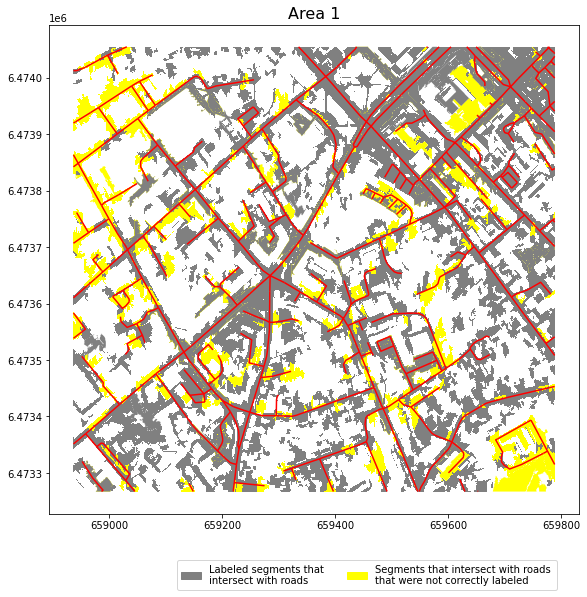

In [78]:


#area1
st_area_1 = gpd.read_file(r".\vector\st_area_1.shp")


area_1_segmn_binary_road = area_1_segmn_binary.loc[area_1_segmn_binary['cat_p'] == 1]

fig, ax = plt.subplots(1, figsize=(12, 9))

st_area_1.plot(ax=ax, color="red", linewidth=1.5)

intersection_area1.plot(ax=ax, color="yellow") #segmernts that intersected with roads 
area_1_segmn_binary_road.plot(ax=ax, color="grey")

ax.set_title('Area 1', fontsize=16)

grey_patch = mpatches.Patch(color='grey', 
                            label='Labeled segments that \nintersect with roads')
yellow_patch = mpatches.Patch(color='yellow', 
                              label='Segments that intersect with roads \nthat were not correctly labeled')
ax.legend(handles=[grey_patch, yellow_patch], bbox_to_anchor=(0.8, 0), loc="lower right",
                bbox_transform=fig.transFigure, ncol=2)

plt.savefig(r".\Figures\area_1_road_intersecting_segments.png", dpi = 320)

plt.show()

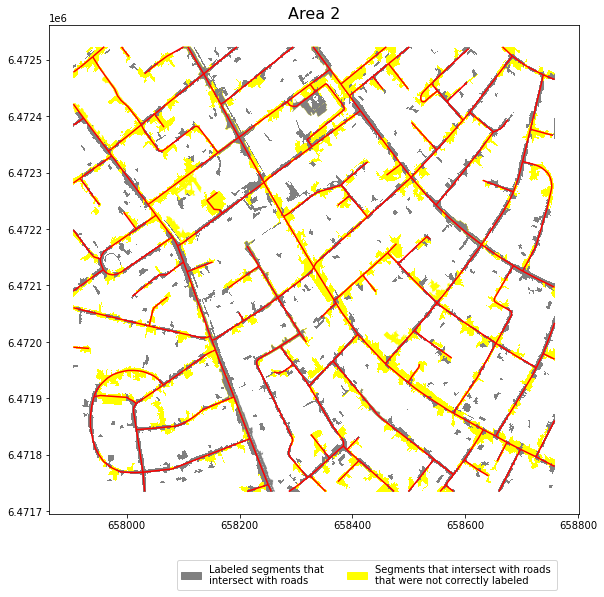

In [81]:
#area 2

st_area_2 = gpd.read_file(r".\vector\st_area_2.shp")

area_2_segmn_binary_road = area_2_segmn_binary.loc[area_2_segmn_binary['cat_p'] == 1]

fig, ax = plt.subplots(1, figsize=(12, 9))

st_area_2.plot(ax=ax, color="red", linewidth=1.5)

intersection_area2.plot(ax=ax, color="yellow") #segmernts that intersected with roads 
area_2_segmn_binary_road.plot(ax=ax, color="grey")
ax.set_title('Area 2', fontsize=16)

grey_patch = mpatches.Patch(color='grey', 
                            label='Labeled segments that \nintersect with roads')
yellow_patch = mpatches.Patch(color='yellow', 
                              label='Segments that intersect with roads \nthat were not correctly labeled')#adding a legend
ax.legend(handles=[grey_patch, yellow_patch], bbox_to_anchor=(0.8, 0), loc="lower right",
                bbox_transform=fig.transFigure, ncol=2)

plt.savefig(r".\Figures\area_2_road_intersecting_segments.png", dpi = 320)

plt.show()

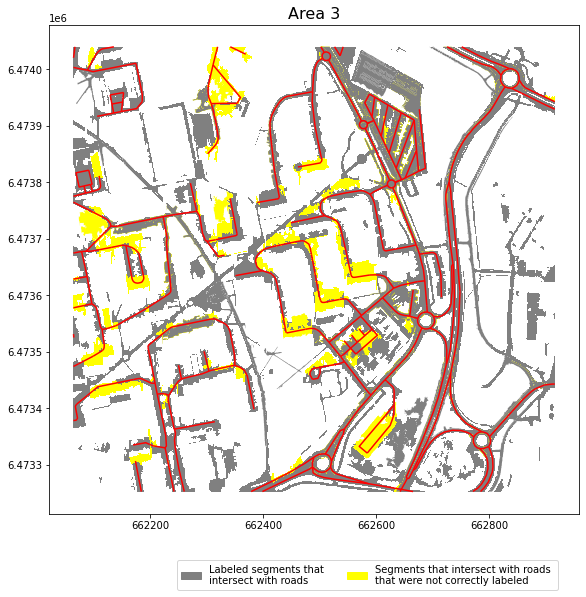

In [83]:
#area 3

st_area_3 = gpd.read_file(r".\vector\st_area_3.shp")

area_3_segmn_binary_road = area_3_segmn_binary.loc[area_3_segmn_binary['cat_p'] == 1]

fig, ax = plt.subplots(1, figsize=(12, 9))

st_area_3.plot(ax=ax, color="red", linewidth=1.5)
intersection_area3.plot(ax=ax, color="yellow") #segmernts that intersected with roads 
area_3_segmn_binary_road.plot(ax=ax, color="grey")
ax.set_title('Area 3', fontsize=16)

grey_patch = mpatches.Patch(color='grey', 
                            label='Labeled segments that \nintersect with roads')
yellow_patch = mpatches.Patch(color='yellow', 
                              label='Segments that intersect with roads \nthat were not correctly labeled')#adding a legend
ax.legend(handles=[grey_patch, yellow_patch], bbox_to_anchor=(0.8, 0), loc="lower right",
                bbox_transform=fig.transFigure, ncol=2)

plt.savefig(r".\Figures\area_3_road_intersecting_segments.png", dpi = 320)
plt.show()

1
1    1197
Name: cat_p, dtype: int64
0    647
Name: cat_p, dtype: int64


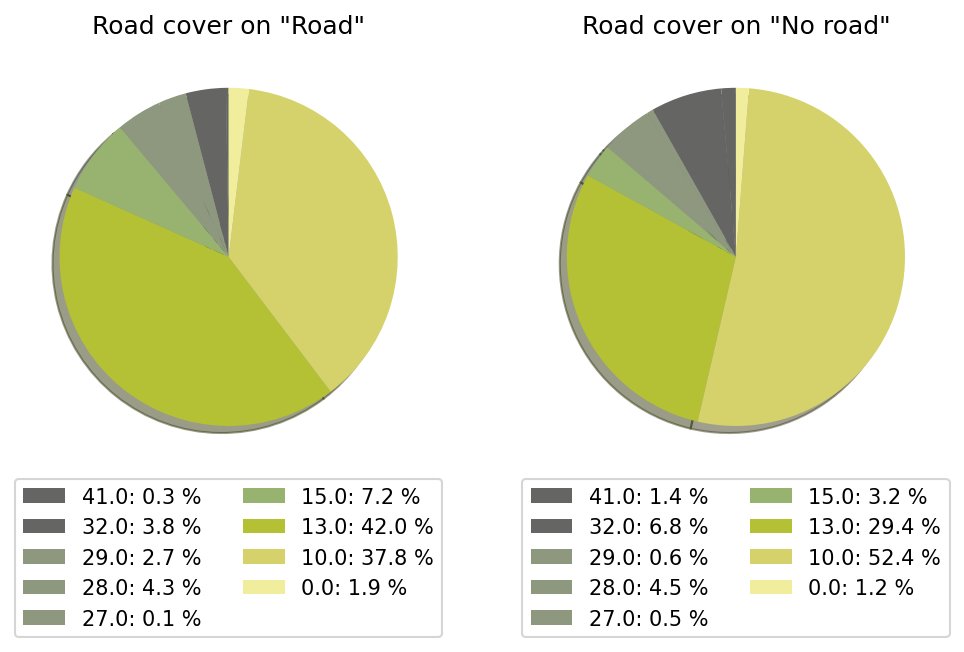

2
1    643
Name: cat_p, dtype: int64
0    876
Name: cat_p, dtype: int64


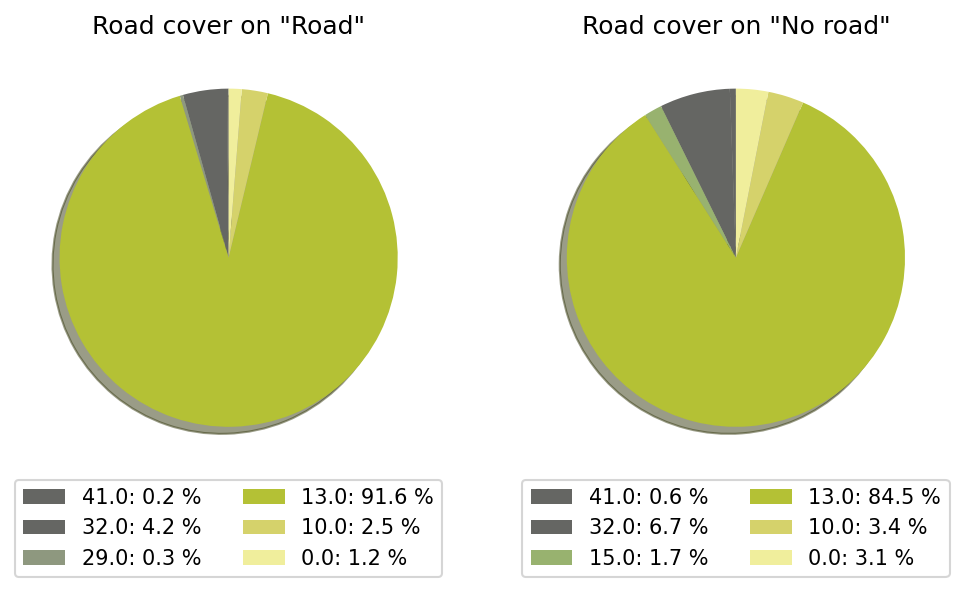

3
1    751
Name: cat_p, dtype: int64
0    208
Name: cat_p, dtype: int64


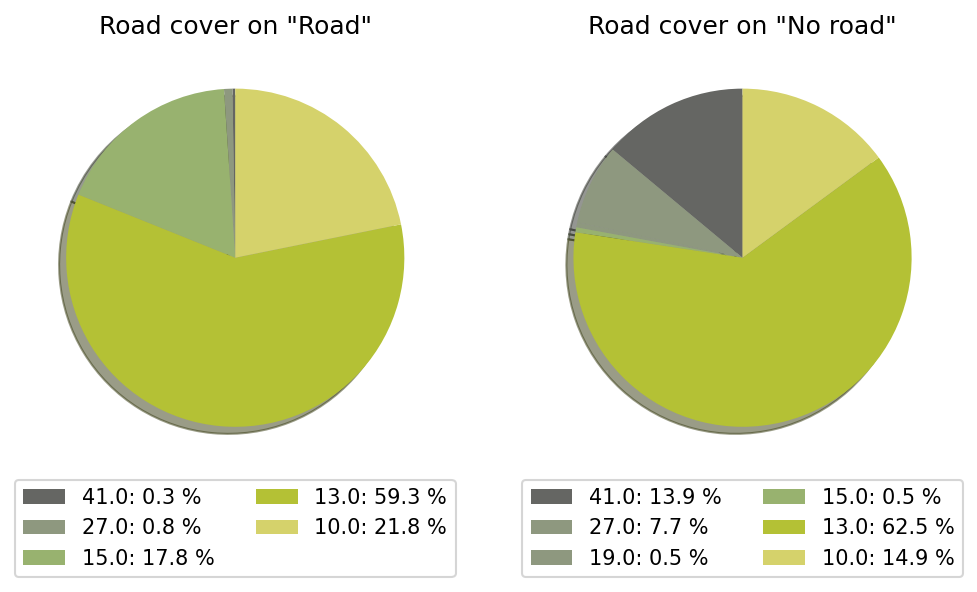

In [84]:
#looking at the road cover ("Kate")
dict_colors = {'0.0': '#F0EE9C',
              '10.0': '#D5D26B',
              '13.0':'#B4C135',
              '15.0':'#98B26F',
              '19.0':'#8E987F',
              '27.0':'#8E987F',
              '28.0':'#8E987F',
              '29.0':'#8E987F',
              '31.0':'#8E987F',
              '32.0':'#656663',
              '41.0':'#656663' #
              }
labels_cover = ['unknown', 'with cover (type unknown)', 'dense asphalt concrete', 'crushed asphalt', 'drained asphalt concrete', 
                 'surfaced gravel road', 'cobblestone road', 'pavement ("sillutsikate")', 'crished stone',
                 'gravel road', 'dirt road']


for i in main_results:
    print(i.split("_")[-1].split(".")[0])
   
    gdf = gpd.read_file(i)

    
    gdf_road = gdf.loc[gdf.cat_p  == 1]
    gdf_Nroad = gdf.loc[gdf.cat_p  == 0]
    
     # the same figure for both subplots
    fig = plt.figure(figsize=(8,8),dpi=150)
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    unq_list_R =  gdf_road['Kate'].sort_values(ascending=False).astype(str).unique()
    unq_list_NR = gdf_Nroad['Kate'].sort_values(ascending=False).astype(str).unique()
    
    ax1.pie(gdf_road.Kate.value_counts().sort_index(ascending=False), colors = [dict_colors[key] for key in unq_list_R],
            shadow=True, startangle=90 )

    ax2.pie(gdf_Nroad.Kate.value_counts().sort_index(ascending=False),colors =[dict_colors[key] for key in unq_list_NR],
            shadow=True, startangle=90)
    
    print(gdf_road.cat_p.value_counts())
    print(gdf_Nroad.cat_p.value_counts())
    
    ax1.set_title('Road cover on "Road"')
    ax2.set_title('Road cover on "No road"')
    
    percentR = gdf_road.Kate.value_counts().sort_index(ascending=False).to_numpy() * 100 / gdf_road.Kate.value_counts().sort_index(ascending=False).to_numpy().sum()
    percentsNR = gdf_Nroad.Kate.value_counts().sort_index(ascending=False).to_numpy() * 100 / gdf_Nroad.Kate.value_counts().sort_index(ascending=False).to_numpy().sum()
    
          
    if len(gdf_road.Kate.unique()) > 4 :
        anch = (0.42,0.4)
    else:
        anch = (0.42,0.68)
    
    ax1.legend(bbox_to_anchor=(0.5, 0), loc='upper center', fancybox=True, ncol=2,
            labels=['%s: %1.1f %%' % (l, s) for l, s in zip(gdf_road.Kate.value_counts().sort_index(ascending=False).index,
                                                            percentR)]
              )
    
    ax2.legend(bbox_to_anchor=(0.5, 0), loc='upper center', fancybox=True, ncol=2,
            labels=['%s: %1.1f %%' % (l, s) for l, s in zip(gdf_Nroad.Kate.value_counts().sort_index(ascending=False).index,
                                                            percentsNR)]
               

    
    )
    plt.savefig(os.path.join(r".\results", "KatepieCh_"+i.split("_")[-1].split(".")[0]+".png"), dpi = 320)
    plt.show()